# Bouncing ball
Philipp Schlatter, April 2022

In [2]:
%matplotlib notebook 
# possible options: notebook, inline or widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.integrate import solve_ivp
params = {'legend.fontsize': 12,
          'legend.loc':'best',
          'figure.figsize': (8,5),
          'lines.markerfacecolor':'none',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize':12,
          'ytick.labelsize':12,
          'grid.alpha':0.6}
pylab.rcParams.update(params)

Define parameters and initial conditions:

In [51]:
# The coefficient of restitution for bounces (-v_up/v_down).
e_coeff = np.sqrt(2)/2
# gravitational acceleration (m/s^2)
g = 9.81
# maximum x for trajectory
xmax = 5
# time step
dt = 0.005
# Initial conditions for position and velocity
x0, y0   = 0, 5
vx0, vy0 = 1, 0
t=0

<IPython.core.display.Javascript object>


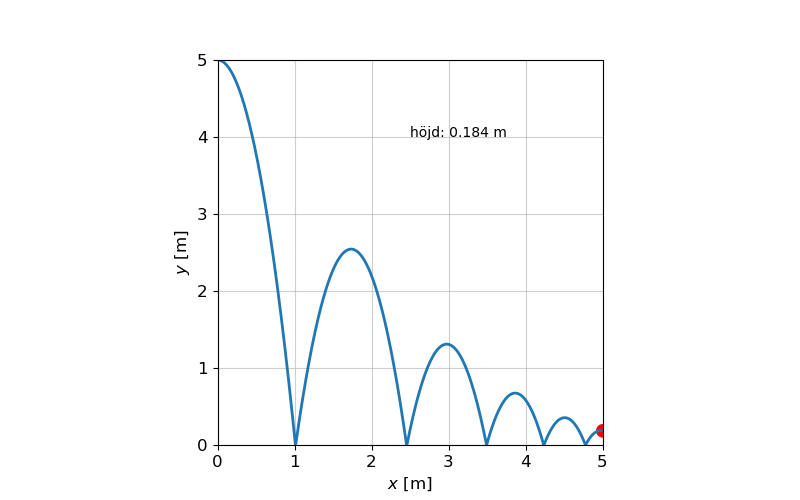

In [53]:
def get_pos(t=0):
    """Generator yielding the ball's position at time t"""
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < xmax:
        t += dt
        x += vx0 * dt
        y += vy * dt
        vy -= g * dt
        if y < 0:
            # bounce at the wall
            y = 0
            vy = -vy * e_coeff 
        yield x, y

def init():
    """Initialisation of the plotting"""
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, y0)
    ax.set_xlabel('$x$ [m]')
    ax.set_ylabel('$y$ [m]')
    ax.grid()
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'höjd: {y0:.3f} m')
    return line, ball, height_text

def animate(pos):
    """New frame by advancing the pos generator"""
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'höjd: {y:.3f} m')
    return line, ball, height_text

# Figure with unit aspect ratio
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Corresponding pointers to plot elements
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08,color='r')
height_text = ax.text(xmax*0.5, y0*0.8, f'höjd: {y0:.3f} m')
ax.add_patch(ball)
xdata, ydata = [], []

ani = matplotlib.animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=0, repeat=False, init_func=init)
plt.show()

In [50]:
def get_posvel(t=0):
    """A generator yielding the ball's position and velcoity at time t."""
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < xmax:
        t += dt
        x += vx0 * dt
        y += vy * dt
        vy -= g * dt
        if y < 0:
            # bounce at the wall
            y = 0
            vy = -vy * e_coeff 
        yield x, y, vx, vy, t

In [45]:
# re-create the complete history (not very elegant)
t=0
posvel=get_posvel(5)

In [46]:
# Compute mechanical energies
NN = 1000
Ek=np.zeros((NN,1))
Ep=np.zeros((NN,1))
T=np.zeros((NN,1))
for i in range(NN):
    x,y,vx,vy,t = next(posvel)
    Ek[i,0] = 0.5*(vx**2 + vy**2)
    Ep[i,0] = g*y
    T[i]=x

<IPython.core.display.Javascript object>


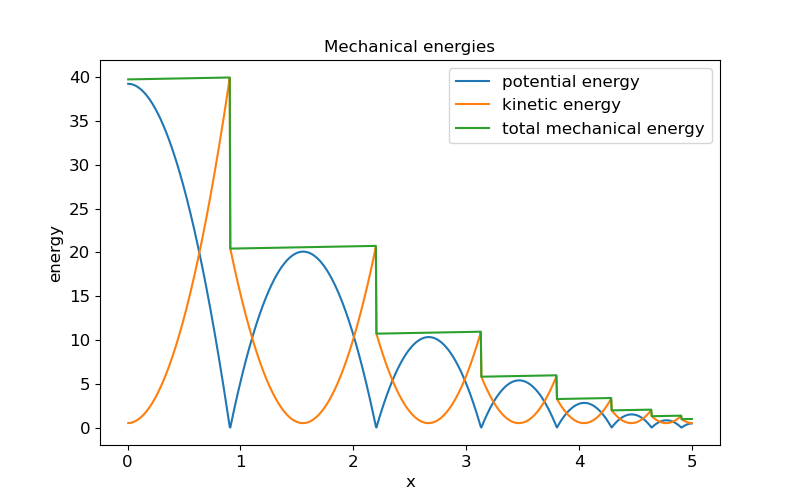

In [47]:
fig = plt.figure()
plt.title('Mechanical energies')
plt.plot(T,Ep,label='potential energy')
plt.plot(T,Ek,label='kinetic energy')
plt.plot(T,Ek+Ep,label='total mechanical energy')
plt.xlabel('x')
plt.ylabel('energy')
plt.legend()
plt.show()